In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import statistics
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## 1 задание

In [4]:
dat = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
df_ = pd.DataFrame(dat, columns=['weather', 'stroll'])
df_

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


$P(True|rain) =\frac{P(true) \cdot P(rain | True)}{P(rain)}$

In [5]:
p_rain_if_stroll = len(df_.loc[(df_['weather'] == 'дождь') & (df_['stroll'] == True)]) / len(df_.loc[df_['stroll'] == True])

In [6]:
p_stroll_if_rain = ((len(df_.loc[df_['stroll'] == True]) / len(df_))*p_rain_if_stroll)/(len(df_.loc[df_['weather'] == 'дождь']) / len(df_))
p_stroll_if_rain

0.3333333333333333

## 2 задание

In [7]:
df= pd.read_csv('Data4.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [9]:
df.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False


In [10]:
df.isna().sum()

id                    570
name                   46
est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

In [11]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.026600e+04,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,1.438528e+07,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,2.087357e+07,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448595e+06,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,3.748364e+06,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [12]:
df.duplicated().sum()

0

In [13]:
df['id']=df['id'].map(lambda y: np.random.uniform(((df['id'].min()).round()), ((df['id'].max()).round()) if pd.isna(y) else y))
df['id']

0        3.044261e+06
1        2.714135e+07
2        3.651796e+06
3        3.088649e+06
4        3.020527e+06
             ...     
90831    4.561446e+07
90832    2.609652e+06
90833    3.713598e+06
90834    3.520772e+06
90835    2.235401e+06
Name: id, Length: 90836, dtype: float64

In [14]:
df['name']=df['name'].fillna('unknown')
df['name']

0          (2011 GZ2)
1          (2020 HT6)
2        (2016 ED156)
3          (2013 FD8)
4         (2016 CW31)
             ...     
90831       (2021 YE)
90832       (2018 KL)
90833    (2016 AB166)
90834    (2014 SQ260)
90835      (2012 EQ3)
Name: name, Length: 90836, dtype: object

In [15]:
df.pop('name')

0          (2011 GZ2)
1          (2020 HT6)
2        (2016 ED156)
3          (2013 FD8)
4         (2016 CW31)
             ...     
90831       (2021 YE)
90832       (2018 KL)
90833    (2016 AB166)
90834    (2014 SQ260)
90835      (2012 EQ3)
Name: name, Length: 90836, dtype: object

In [16]:
df['est_diameter_max']=df['est_diameter_max'].map(lambda y: np.random.uniform(((df['est_diameter_max'].min()).round()), ((df['est_diameter_max'].max()).round()) if pd.isna(y) else y))
df['est_diameter_max']

0        0.020206
1        0.035639
2        0.063204
3        0.007386
4        0.146278
           ...   
90831    0.004781
90832    0.130688
90833    0.054973
90834    0.008825
90835    0.165148
Name: est_diameter_max, Length: 90836, dtype: float64

In [17]:
df['relative_velocity']=df['relative_velocity'].map(lambda y: np.random.uniform(((df['relative_velocity'].min()).round()), ((df['relative_velocity'].max()).round()) if pd.isna(y) else y))
df['relative_velocity']

0        35402.386560
1         2674.760071
2        40795.353377
3        15637.306433
4        55025.727658
             ...     
90831    16034.643203
90832    13769.539060
90833    15772.756168
90834     6760.052052
90835    40483.283934
Name: relative_velocity, Length: 90836, dtype: float64

In [18]:
df['absolute_magnitude']=df['absolute_magnitude'].map(lambda y: np.random.uniform(((df['absolute_magnitude'].min()).round()), ((df['absolute_magnitude'].max()).round()) if pd.isna(y) else y))
df['absolute_magnitude']

0        24.014301
1        22.345451
2        10.988182
3        17.036608
4        12.554665
           ...    
90831    12.002085
90832    10.302897
90833    13.767049
90834    23.392457
90835    20.037017
Name: absolute_magnitude, Length: 90836, dtype: float64

In [19]:
df.isna().sum()

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [20]:
df.duplicated().sum()

0

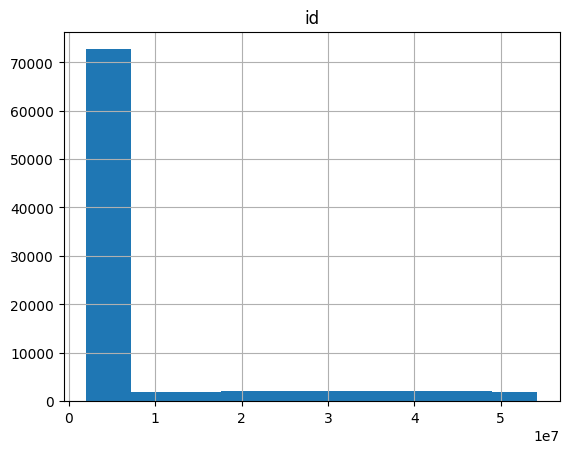

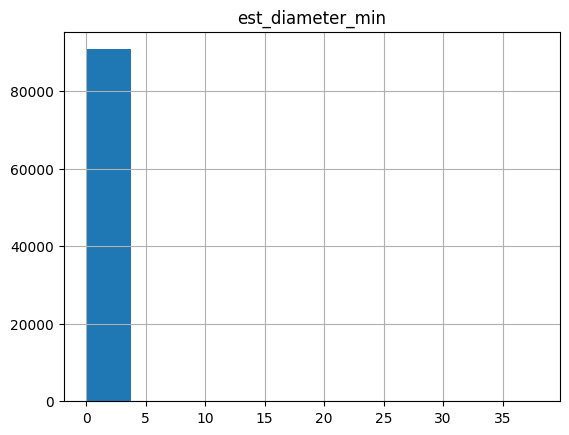

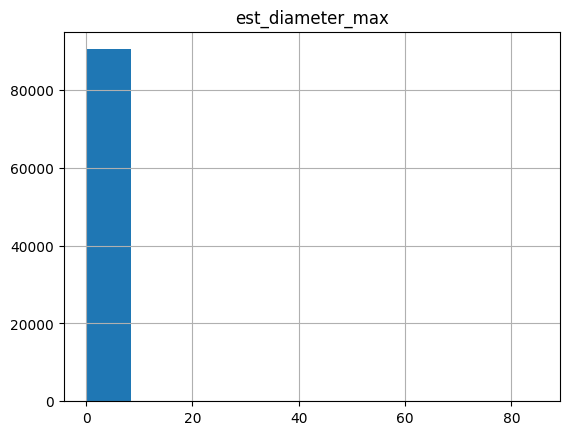

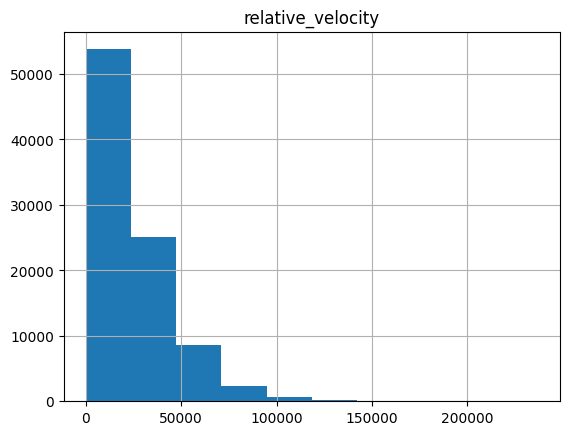

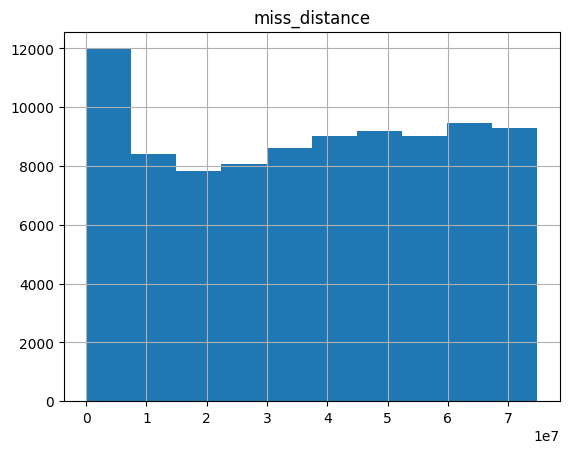

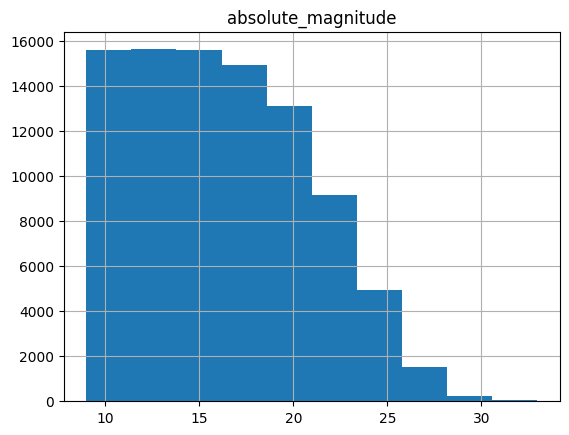

In [21]:
df.describe()[['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
columns = ['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

for column in columns:
    df.hist(column)

In [22]:
outlier = df[['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
outlier

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,3.044261e+06,0.016016,0.020206,35402.386560,1.024333e+06,24.014301
1,2.714135e+07,0.030518,0.035639,2674.760071,3.268186e+07,22.345451
2,3.651796e+06,0.055533,0.063204,40795.353377,6.538636e+07,10.988182
3,3.088649e+06,0.019256,0.007386,15637.306433,1.260796e+07,17.036608
4,3.020527e+06,0.139494,0.146278,55025.727658,7.130590e+07,12.554665
...,...,...,...,...,...,...
90831,4.561446e+07,0.017561,0.004781,16034.643203,1.635007e+06,12.002085
90832,2.609652e+06,0.110804,0.130688,13769.539060,3.351901e+07,10.302897
90833,3.713598e+06,0.035039,0.054973,15772.756168,5.471396e+07,13.767049
90834,3.520772e+06,0.044112,0.008825,6760.052052,2.694877e+07,23.392457


In [23]:
Q1 = outlier.quantile(0.25)
Q1

id                    2.342397e+06
est_diameter_min      1.925551e-02
est_diameter_max      1.507776e-02
relative_velocity     8.925288e+03
miss_distance         1.721082e+07
absolute_magnitude    1.247188e+01
Name: 0.25, dtype: float64

In [24]:
Q3 = outlier.quantile(0.75)
Q3

id                    3.626243e+06
est_diameter_min      1.434019e-01
est_diameter_max      1.429207e-01
relative_velocity     3.446498e+04
miss_distance         5.654900e+07
absolute_magnitude    1.968509e+01
Name: 0.75, dtype: float64

In [25]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,3.044261e+06,0.016016,0.020206,35402.386560,1.024333e+06,24.014301
2,3.651796e+06,0.055533,0.063204,40795.353377,6.538636e+07,10.988182
3,3.088649e+06,0.019256,0.007386,15637.306433,1.260796e+07,17.036608
4,3.020527e+06,0.139494,0.146278,55025.727658,7.130590e+07,12.554665
5,3.122397e+06,0.046191,0.015341,18787.721680,2.847083e+07,10.390783
...,...,...,...,...,...,...
90830,2.772431e+06,0.008405,0.016822,3461.305796,3.821292e+06,25.005403
90832,2.609652e+06,0.110804,0.130688,13769.539060,3.351901e+07,10.302897
90833,3.713598e+06,0.035039,0.054973,15772.756168,5.471396e+07,13.767049
90834,3.520772e+06,0.044112,0.008825,6760.052052,2.694877e+07,23.392457


In [26]:
index_list = list(data_filtered.index.values)
data_filtered = df[df.index.isin(index_list)]
data_filtered.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3.044261e+06,0.016016,0.020206,35402.386560,1.024333e+06,24.014301,False
2,3.651796e+06,0.055533,0.063204,40795.353377,6.538636e+07,10.988182,False
3,3.088649e+06,0.019256,0.007386,15637.306433,1.260796e+07,17.036608,False
4,3.020527e+06,0.139494,0.146278,55025.727658,7.130590e+07,12.554665,False
5,3.122397e+06,0.046191,0.015341,18787.721680,2.847083e+07,10.390783,False


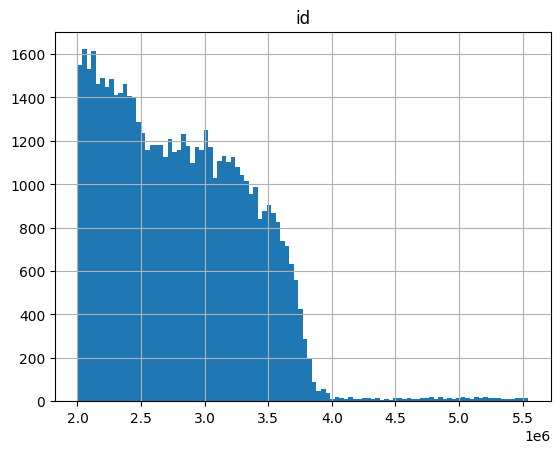

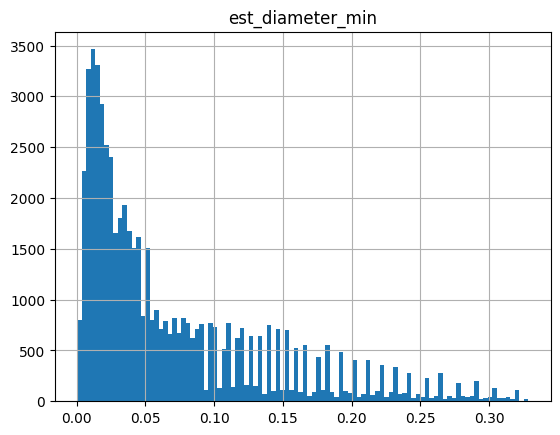

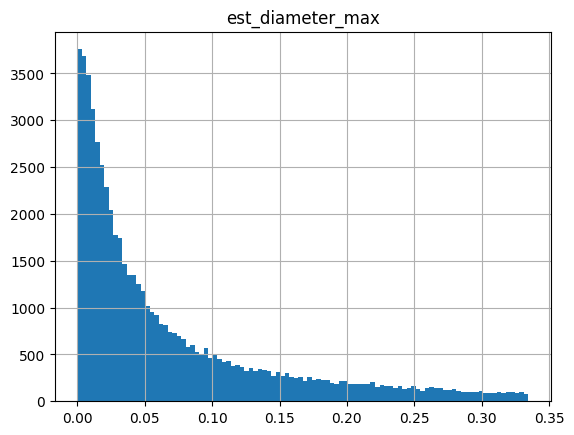

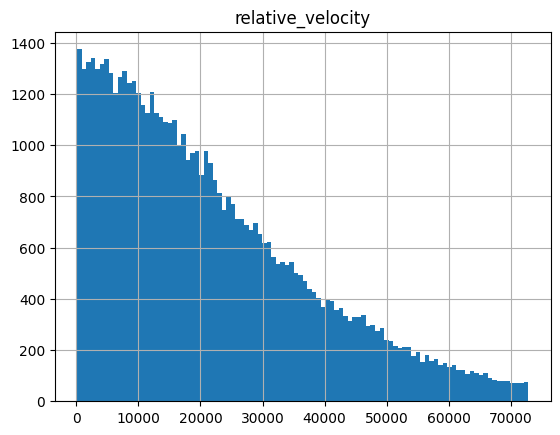

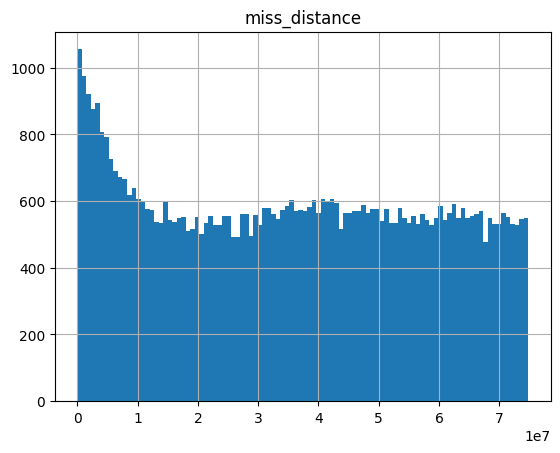

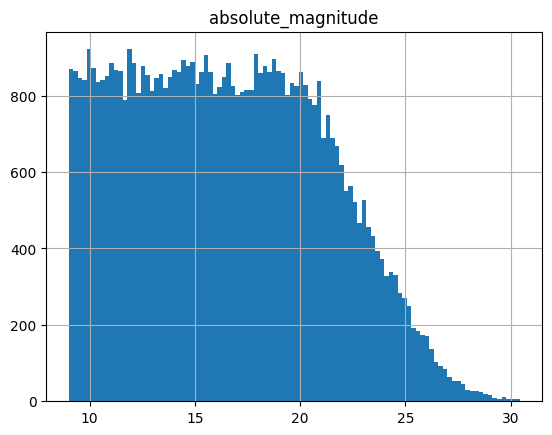

In [27]:
filtered_outlier = data_filtered[['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  float64
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
 6   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6)
memory usage: 4.2 MB


In [29]:
data_filtered.loc[(data_filtered['hazardous'] == "True"), 'hazardous'] = 1
data_filtered.loc[(data_filtered['hazardous'] == "False"), 'hazardous'] = 0
data_filtered['hazardous'] = data_filtered['hazardous'].astype(float)

C:\Users\Полина\AppData\Local\Temp\ipykernel_6164\4058979185.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_filtered.loc[(data_filtered['hazardous'] == "True"), 'hazardous'] = 1
C:\Users\Полина\AppData\Local\Temp\ipykernel_6164\4058979185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['hazardous'] = data_filtered['hazardous'].astype(float)


D:\environment\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\environment\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


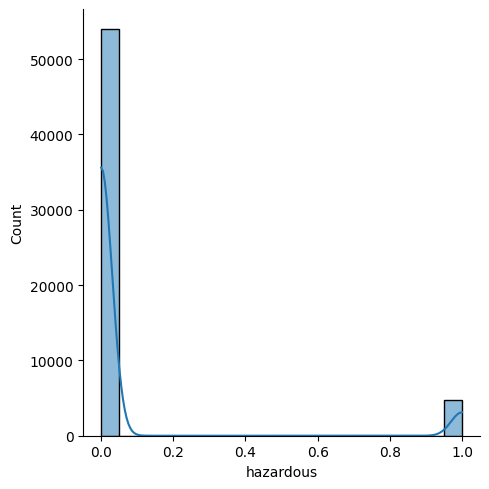

In [30]:
sns.displot(data_filtered["hazardous"],bins=20,kde=True);

In [31]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_filtered.drop(['hazardous'], axis=1))

In [32]:
Y = data_filtered["hazardous"]
X = data_scaler
Y

0        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
90830    0.0
90832    0.0
90833    0.0
90834    0.0
90835    0.0
Name: hazardous, Length: 58647, dtype: float64

In [33]:
X

array([[ 0.44196629, -0.78563747, -0.64207759,  0.84648909, -1.5496496 ,
         1.6396786 ],
       [ 1.56715163, -0.21404049, -0.0804918 ,  1.17594223,  1.33771713,
        -1.21267896],
       [ 0.52417461, -0.73878036, -0.80951663, -0.36094795, -1.02999268,
         0.11175809],
       ...,
       [ 1.68161191, -0.51047753, -0.18799809, -0.35267341,  0.85893907,
        -0.60418442],
       [ 1.32448813, -0.3792483 , -0.79072413, -0.90325417, -0.38664457,
         1.50351223],
       [-1.05608498,  0.20409429,  1.25096567,  1.1568781 ,  0.03340537,
         0.76876416]])

In [34]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, Y)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((72280, 6), (72280,), (35602, 6), (35602,))

In [37]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2) 
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
y_bin_knn_pred = knn.predict(X_test)
y_bin_knn_pred

array([1., 0., 1., ..., 0., 0., 1.])

In [39]:
confusion_matrix(Y_test, y_bin_knn_pred)

array([[14940,  2939],
       [   41, 17682]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     17879
         1.0       0.86      1.00      0.92     17723

    accuracy                           0.92     35602
   macro avg       0.93      0.92      0.92     35602
weighted avg       0.93      0.92      0.92     35602



In [41]:
from collections import Counter
Counter(Y_test)

Counter({0.0: 17879, 1.0: 17723})

In [42]:
def accuracy_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FP=arr[0,1]
    FN=arr[1,0]
    TN=arr[1,1]
    return((TP+TN)/(TP+TN+FP+FN))

In [43]:
def precision_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FP=arr[0,1]
    return(TP/(TP+FP))

In [44]:
def recall_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FN=arr[1,0]
    return(TP/(TP+FN))

In [45]:
def f1_score(Y_test, y_bin_knn_pred):
    multy=precision_score(Y_test, y_bin_knn_pred)*recall_score(Y_test, y_bin_knn_pred)
    sum=precision_score(Y_test, y_bin_knn_pred)+recall_score(Y_test, y_bin_knn_pred)
    return( 2*(multy/sum) )

In [46]:
accuracy_score(Y_test, y_bin_knn_pred)

0.9162968372563339

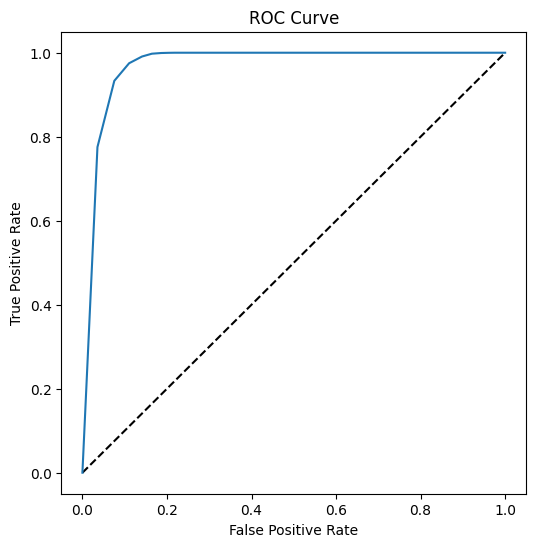

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
%matplotlib inline

y_scores = knn.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9700997051098481


In [49]:
rec = recall_score(Y_test,y_bin_knn_pred)
print(rec)

0.997263200053401


In [50]:
prec = precision_score(Y_test,y_bin_knn_pred)
print(prec)

0.835617204541641


In [51]:
print(f1_score(Y_test, y_bin_knn_pred))

0.9093122337188071


In [52]:
ridge = Ridge(alpha=0.5).fit(X_train, Y_train)

In [53]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, Y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_NB = gnb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84     17879
         1.0       0.83      0.85      0.84     17723

    accuracy                           0.84     35602
   macro avg       0.84      0.84      0.84     35602
weighted avg       0.84      0.84      0.84     35602



In [55]:
accuracy_score(Y_test, Y_pred_NB)

0.8375372170102803

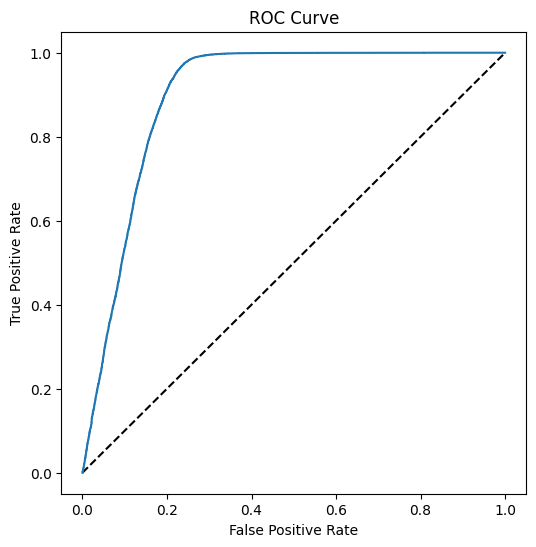

In [56]:
%matplotlib inline

y_scores = gnb.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.8991881096596614


In [58]:
rec = recall_score(Y_test,Y_pred_NB)
print(rec)

0.8485389891072561


In [59]:
prec = precision_score(Y_test,Y_pred_NB)
print(prec)

0.823480060406063


In [60]:
print(f1_score(Y_test, Y_pred_NB))

0.835821742832813


In [61]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression(random_state=42).fit(X_train, Y_train)
Y_pred_log = log.predict(X_test)
log.score(X_train, Y_train)
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87     17879
         1.0       0.84      0.91      0.87     17723

    accuracy                           0.87     35602
   macro avg       0.87      0.87      0.87     35602
weighted avg       0.87      0.87      0.87     35602



In [62]:
accuracy_score(Y_test, Y_pred_log)

0.8697825964833437

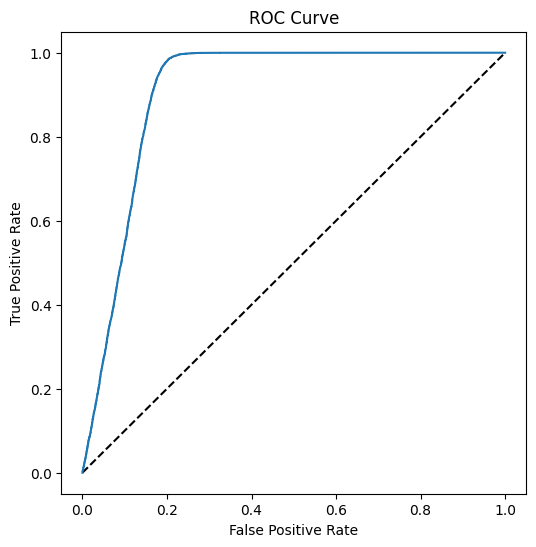

In [63]:
%matplotlib inline

y_scores = log.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [64]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9074139277335409


In [65]:
rec = recall_score(Y_test,Y_pred_log)
print(rec)

0.8991500391825908


In [66]:
prec = precision_score(Y_test,Y_pred_log)
print(prec)

0.834274847586554


In [67]:
from sklearn import svm

clf = svm.SVC(probability=True)
clf.fit(X_train, Y_train)

Y_pred_sv = clf.predict(X_test)
print(classification_report(Y_test, Y_pred_sv))

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89     17879
         1.0       0.83      1.00      0.91     17723

    accuracy                           0.90     35602
   macro avg       0.92      0.90      0.90     35602
weighted avg       0.92      0.90      0.90     35602



In [68]:
print(f1_score(Y_test, Y_pred_log))

0.865498433329465


In [69]:
accuracy_score(Y_test, Y_pred_sv)

0.8997247345654739

In [ ]:
%matplotlib inline

y_scores = clf.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

In [ ]:
rec = recall_score(Y_test,Y_pred_sv)
print(rec)

In [ ]:
prec = precision_score(Y_test,Y_pred_sv)
print(prec)

In [ ]:
print(f1_score(Y_test, Y_pred_sv))

In [ ]:
classifiers = {
    'SVC': clf,
    'KNN classifier': knn,
    'Logistic Regression': log,
    'Gaussian NB': gnb,
}
list = [Y_pred_sv, y_bin_knn_pred, Y_pred_log, Y_pred_NB]

In [ ]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    accuracy = accuracy_score(Y_test, list[index])
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(Y_test,list[index]))